In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

In [3]:
mat = sio.loadmat('./data/ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [11]:
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in  mat['X']])
X.shape

(5000, 1024)

In [12]:
def plot_n_image(X, n):
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))

    first_n_images = X[:n, :]

    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))

    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

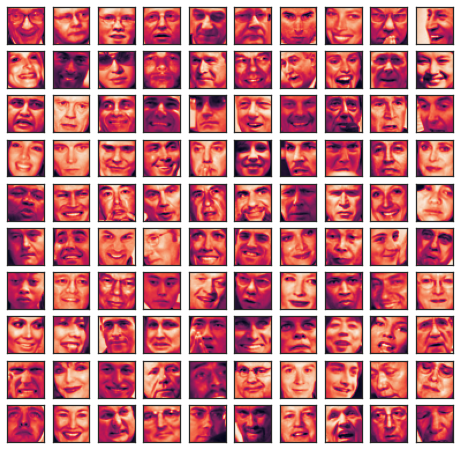

In [13]:
plot_n_image(X, 100)
plt.show()

In [14]:
def pca(X):
    n = X.shape[1]
    for col in range(n):
        X[:, col] = (X[:, col] - X[:, col].mean()) / X[:, col].std()
    
    m = X.shape[0]
    cov = (X.T @ X) / m
    
    U, S, V = np.linalg.svd(cov)

    return U, S, V


In [15]:
def project_data(X, U, K):
    return X @ U[:, :K]

In [16]:
def recover_data(Z, U, K):
    return Z @ U[:, :K].T

In [17]:
U, S, V= pca(X)
U.shape

(1024, 1024)

# reduce dimension to K=100

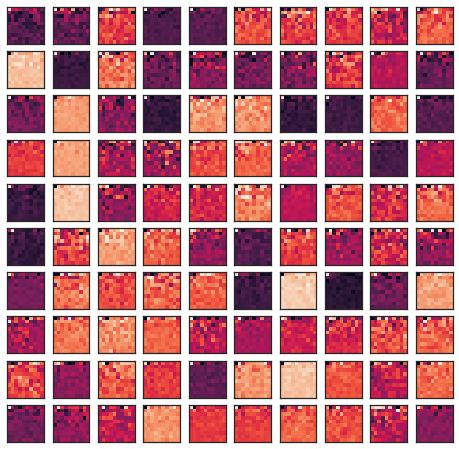

In [18]:
Z = project_data(X, U, 100)
plot_n_image(Z, 100)
plt.show()

# recover from k=100

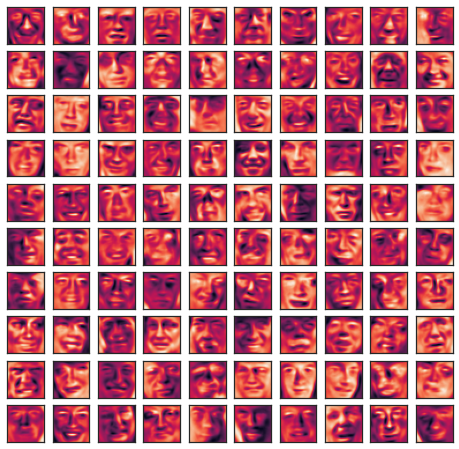

In [19]:
X_recover = recover_data(Z, U, 100)
plot_n_image(X_recover, 100)
plt.show()

# sklearn PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
sk_pca = PCA(n_components=100)

In [22]:
Z = sk_pca.fit_transform(X)
Z.shape

(5000, 100)

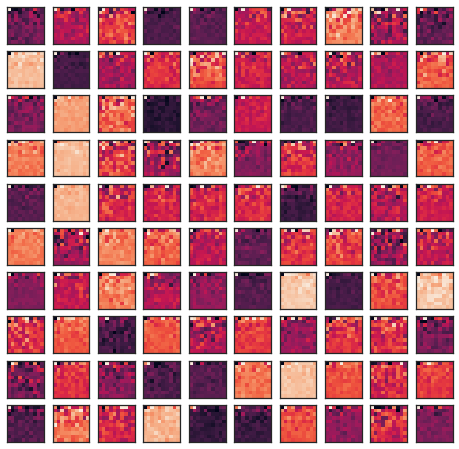

In [23]:
plot_n_image(Z, 100)
plt.show()

In [24]:
X_recover = sk_pca.inverse_transform(Z)
X_recover.shape

(5000, 1024)

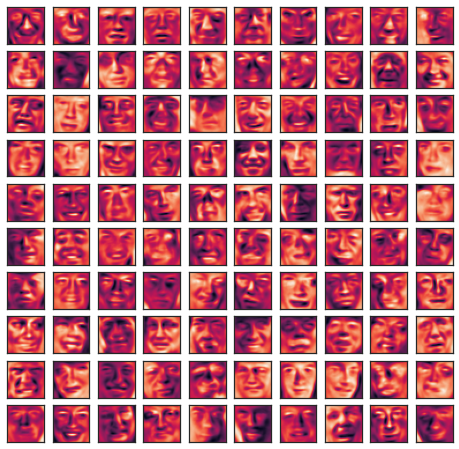

In [25]:
plot_n_image(X_recover, 100)
plt.show()